# Notation and Variables

## Gender
* Y = % of male citizens in city
* X = % of users who publish positive posts about Dilma
* W1 = % of male who publish positive posts about Dilma
* W2 = % of female who publish positive posts about Dilma
* N = Number of users sampled

## Age
* Y = % of people with less than 40 years in city
* X = % of users who publish positive posts about Dilma
* W1 = % of people with less than 40 years who publish positive posts about Dilma
* W2 = % of people with less than 40 years who publish positive posts about Dilma
* N = Number of users sampled

# Loading gender and age data for entire interval

In [22]:
gender_data = read.csv("../data/all_gt_gender.csv")
age_data = read.csv("../data/all_gt_age.csv")
#using only samples with more than 100 microdata
gender_data = gender_data[gender_data$N>100,]
gender_data[1:10,]
age_data = age_data[age_data$N>100,]
age_data[1:10,]
sprintf("Number of cities with N>100: %d (gender_dataset)", length(gender_data$W1)) 
sprintf("Number of cities with N>100: %d (age_dataset)", length(age_data$W1)) 
sprintf("Number of users: %d (gender_dataset)", sum(gender_data$N)) 
sprintf("Number of users: %d (age_dataset)", sum(age_data$N)) 
sprintf("Mean of male support to Dilma over cities: %f%%", mean(gender_data$W1)) 
sprintf("Mean of female support to Dilma over cities: %f%%", mean(gender_data$W2)) 
sprintf("Mean of people with less than 40 years support to Dilma over cities: %f%%", mean(age_data$W1)) 
sprintf("Mean of people with more than 40 years support to Dilma over cities: %f%%", mean(age_data$W2))

,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.468,0.09053961,0.081029,0.1003684,20422
2,São Paulo,0.474,0.05740216,0.05036116,0.06697586,17299
3,Belo Horizonte,0.469,0.06817195,0.06110836,0.07813045,6909
4,Porto Alegre,0.464,0.06663241,0.05660377,0.08003201,5838
5,São Bernardo do Campo,0.483,0.120794,0.1111111,0.135006,4131
6,Curitiba,0.477,0.070353,0.05775862,0.08723281,4051
7,Brasília,0.478,0.08836689,0.08056872,0.09719738,3576
8,Recife,0.462,0.06630984,0.05775401,0.07702612,3363
9,Fortaleza,0.468,0.07333022,0.06429125,0.08705882,2141
10,Goiânia,0.477,0.05840115,0.06326034,0.05140187,2089


,MUNICIPIO,Y,X,W1,W2,N
1,Rio de Janeiro,0.592,0.08937009,0.09198331,0.08101223,24337
2,São Paulo,0.635,0.05798739,0.06338568,0.04265233,21246
3,Belo Horizonte,0.622,0.06813266,0.07323675,0.05193533,8322
4,Porto Alegre,0.589,0.07053404,0.07671857,0.05056514,6947
5,Curitiba,0.632,0.07043926,0.07313196,0.06171875,5054
6,São Bernardo do Campo,0.641,0.1229851,0.1319123,0.106264,5025
7,Brasília,0.705,0.09008189,0.09082368,0.0872818,4396
8,Recife,0.636,0.06776283,0.06790945,0.06732673,4014
9,Fortaleza,0.679,0.07327103,0.07285483,0.0729927,2675
10,Manaus,0.754,0.05685747,0.0633232,0.03497615,2603


[1] "Number of cities with N>100: 159 (gender_dataset)"

[1] "Number of cities with N>100: 181 (age_dataset)"

[1] "Number of users: 121874 (gender_dataset)"

[1] "Number of users: 150759 (age_dataset)"

[1] "Mean of male support to Dilma over cities: 0.071092%"

[1] "Mean of female support to Dilma over cities: 0.099359%"

[1] "Mean of people with less than 40 years support to Dilma over cities: 0.085822%"

[1] "Mean of people with more than 40 years support to Dilma over cities: 0.078081%"

# Plotting ECDF's for gender data

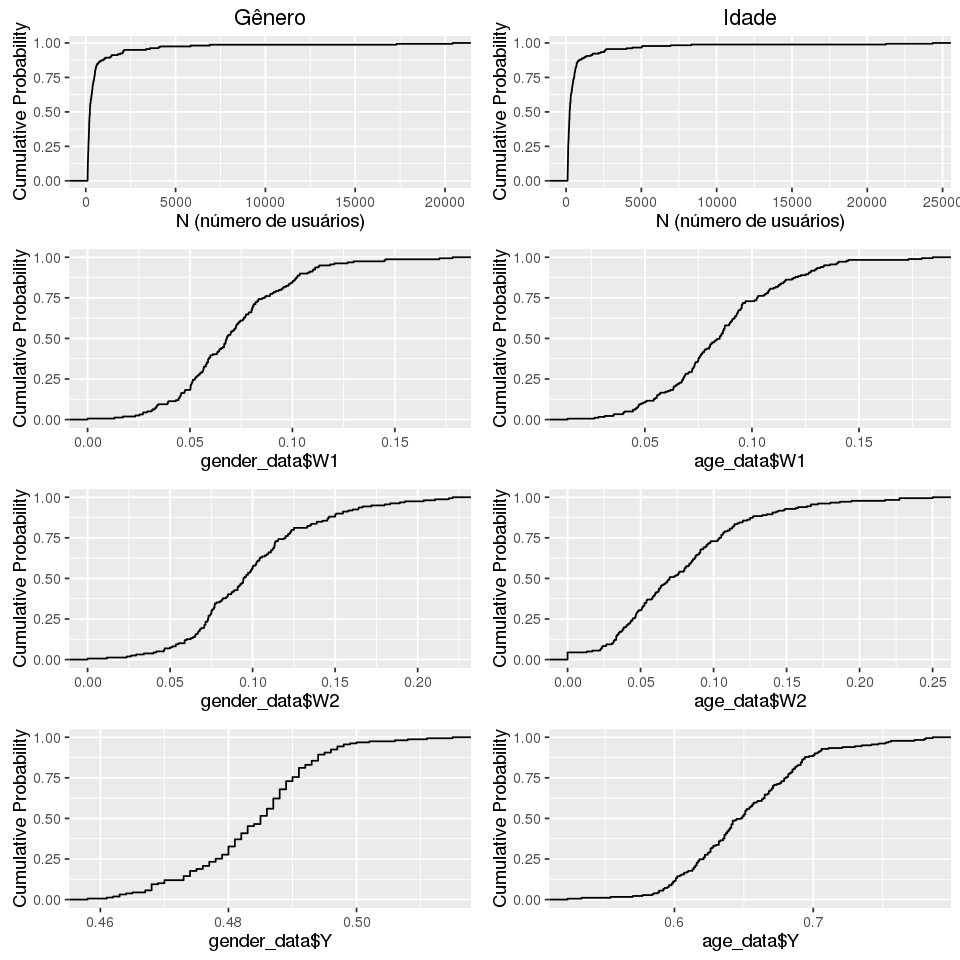

In [72]:
require(ggplot2)
require(gridExtra)
# par(mfrow=c(4,2))
options(repr.plot.width=8,repr.plot.height=8)
plot1= ggplot()+ aes(gender_data$N) + stat_ecdf()  + xlab("N (número de usuários)") +  ylab("Cumulative Probability") + ggtitle("Gênero")
plot2 = ggplot()+ aes(age_data$N) + stat_ecdf() + xlab("N (número de usuários)") +  ylab("Cumulative Probability") + ggtitle("Idade")
plot3= ggplot()+ aes(gender_data$W1) + stat_ecdf() +  ylab("Cumulative Probability") 
plot4 = ggplot()+ aes(age_data$W1) + stat_ecdf() +  ylab("Cumulative Probability")
plot5= ggplot()+ aes(gender_data$W2) + stat_ecdf() +  ylab("Cumulative Probability")
plot6 = ggplot()+ aes(age_data$W2) + stat_ecdf() +  ylab("Cumulative Probability")
plot7= ggplot()+ aes(gender_data$Y) + stat_ecdf() +   ylab("Cumulative Probability")
plot8 = ggplot()+ aes(age_data$Y) + stat_ecdf() +   ylab("Cumulative Probability")

grid.arrange(plot1, plot2,plot3,plot4,plot5,plot6,plot7,plot8,
             nrow=4, ncol=2)

No id variables; using all as measure variables
No id variables; using all as measure variables


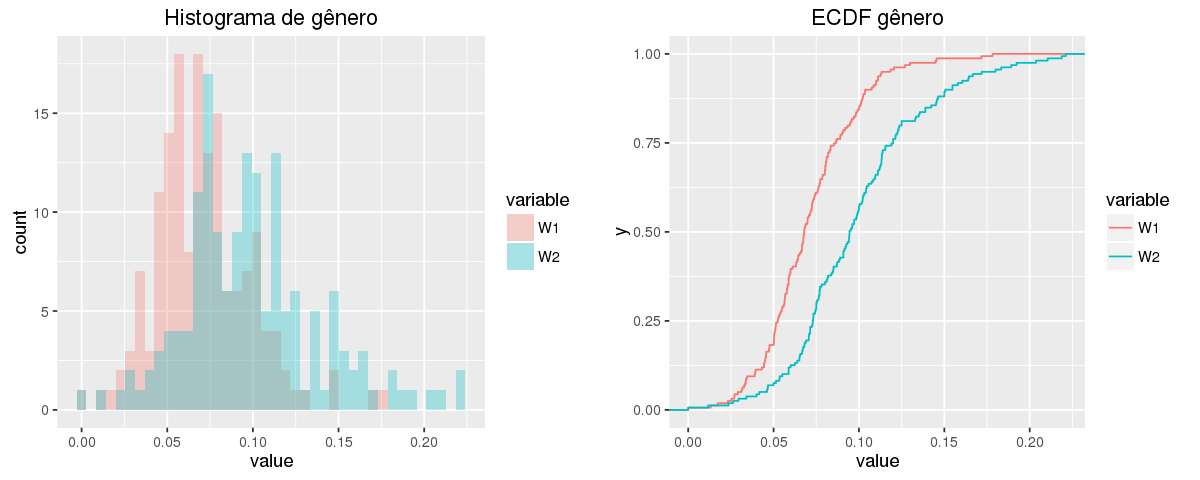

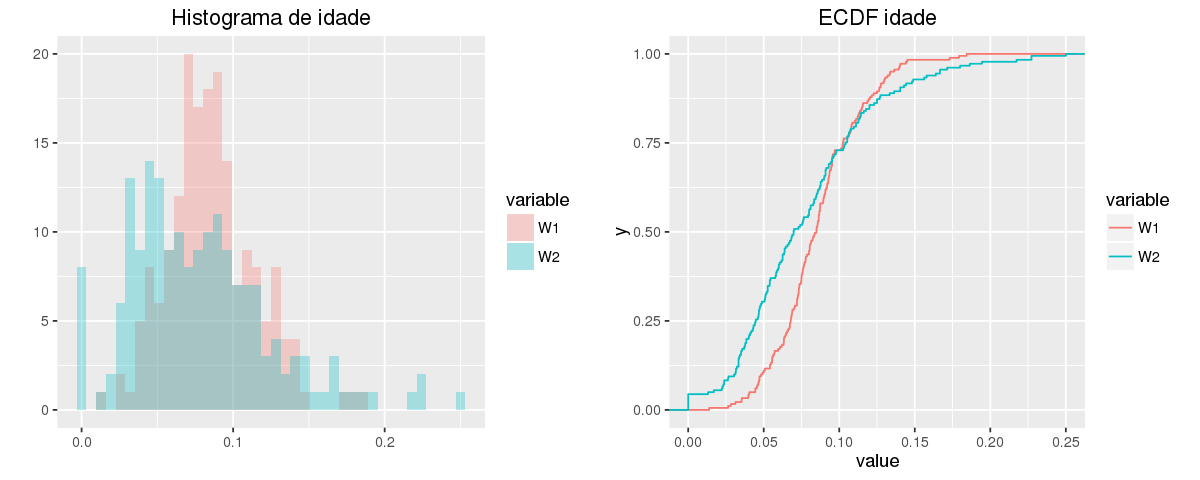

In [115]:
library("reshape2")
library("plyr")
ggdata <- data.frame(W1 = gender_data$W1, W2 = gender_data$W2)
ggdata <- melt(ggdata)
ggdata <- ddply(ggdata, .(variable), transform, ecd=ecdf(value)(value))
hist <- ggplot(ggdata, aes(x=value, fill=variable)) + geom_histogram(alpha=0.3, position="identity",bins = 40) + ggtitle("Histograma de gênero")
options(repr.plot.width=10,repr.plot.height=4)
cdf <- ggplot(ggdata, aes(x=value)) + stat_ecdf(aes(colour=variable)) + ggtitle("ECDF gênero")
grid.arrange(hist, cdf,
             nrow=1, ncol=2)

ggdata <- data.frame(W1 = age_data$W1, W2 = age_data$W2)
ggdata <- melt(ggdata)
ggdata <- ddply(ggdata, .(variable), transform, ecd=ecdf(value)(value))
hist <- ggplot(ggdata, aes(x=value, fill=variable)) + geom_histogram(alpha=0.3, position="identity",bins = 40) + xlab("") +  ylab("")+ ggtitle("Histograma de idade")
options(repr.plot.width=10,repr.plot.height=4)
cdf <- ggplot(ggdata, aes(x=value)) + stat_ecdf(aes(colour=variable)) + ggtitle("ECDF idade")
grid.arrange(hist, cdf,
             nrow=1, ncol=2)

There are some cities with very high population and most have low number of geolocated posts. This motivates a partition into capitals (or cities with high number of posts) and cities with low number of posts.

### Clustering cities according to N. (119 total cities, each with N users with geolocated posts)


K-means clustering with 6 clusters of sizes 8, 4, 6, 39, 2, 100

Cluster means:
        [,1]
1  1374.8750
2  5232.2500
3  2549.0000
4   493.0769
5 18860.5000
6   177.0100

Clustering vector:
  [1] 5 5 2 2 2 2 3 3 3 3 3 3 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [38] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [75] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[112] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
[149] 6 6 6 6 6 6 6 6 6 6 6

Within cluster sum of squares by cluster:
[1]  813678.9 5786526.8 2568838.0  584136.8 4876564.5  352449.0
 (between_SS / total_SS =  98.1 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      
K-means clustering with 6 clusters of sizes 2, 6, 41, 120, 8, 4

Cluster means:
        [,1]
1 22791.5000
2  3129.5000
3   594.8049
4   193.4667
5  1681

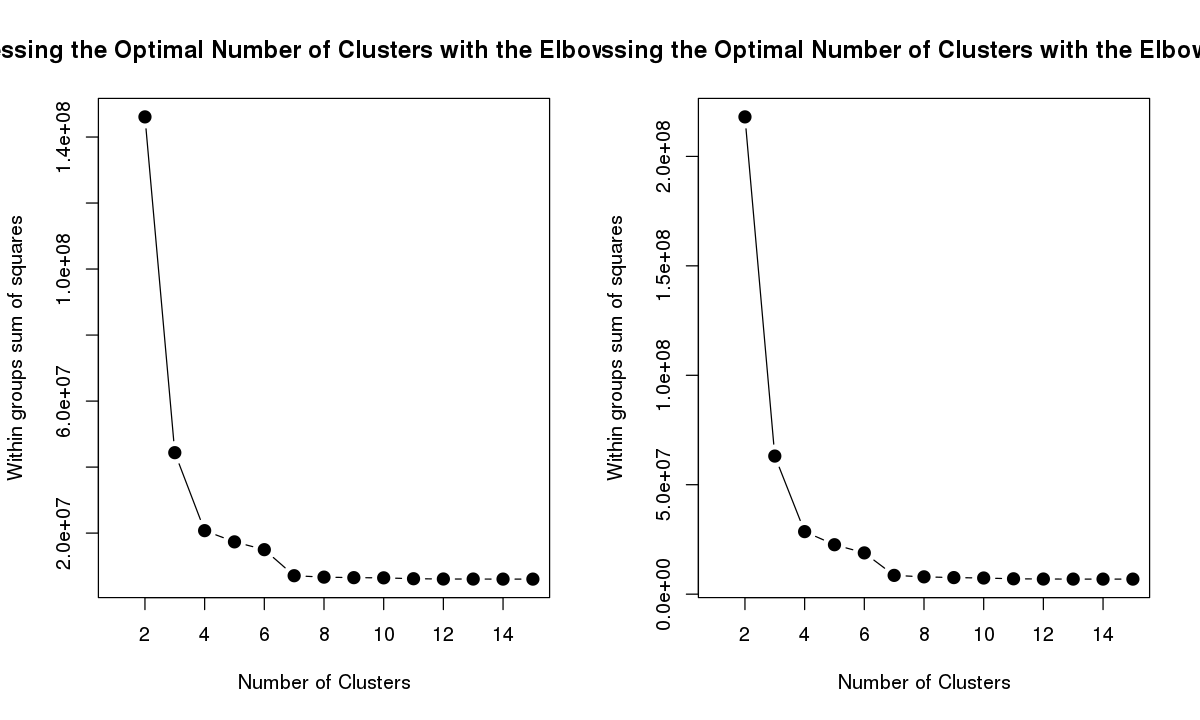

In [40]:
# (kc <- kmeans(gender_data$N, 2)) 
par(mfrow=c(1,2))
options(repr.plot.width=10,repr.plot.height=6)
wss <- c()
for (i in 2:15) wss[i] <-(sum(kmeans(gender_data$N,
                                       centers=i)$withinss))
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares",
     main="Assessing the Optimal Number of Clusters with the Elbow Method",
     pch=20, cex=2)
    
wss <- c()
for (i in 2:15) wss[i] <-(sum(kmeans(age_data$N,
                                       centers=i)$withinss))
plot(1:15, wss, type="b", xlab="Number of Clusters",
     ylab="Within groups sum of squares",
     main="Assessing the Optimal Number of Clusters with the Elbow Method",
     pch=20, cex=2)
    
print(kc <- kmeans(gender_data$N, 6)) 
print(kc <- kmeans(age_data$N, 6)) 

# Is there a correlation between aggregate gender/age and support to Dilma over cities (X vs Y plots)?

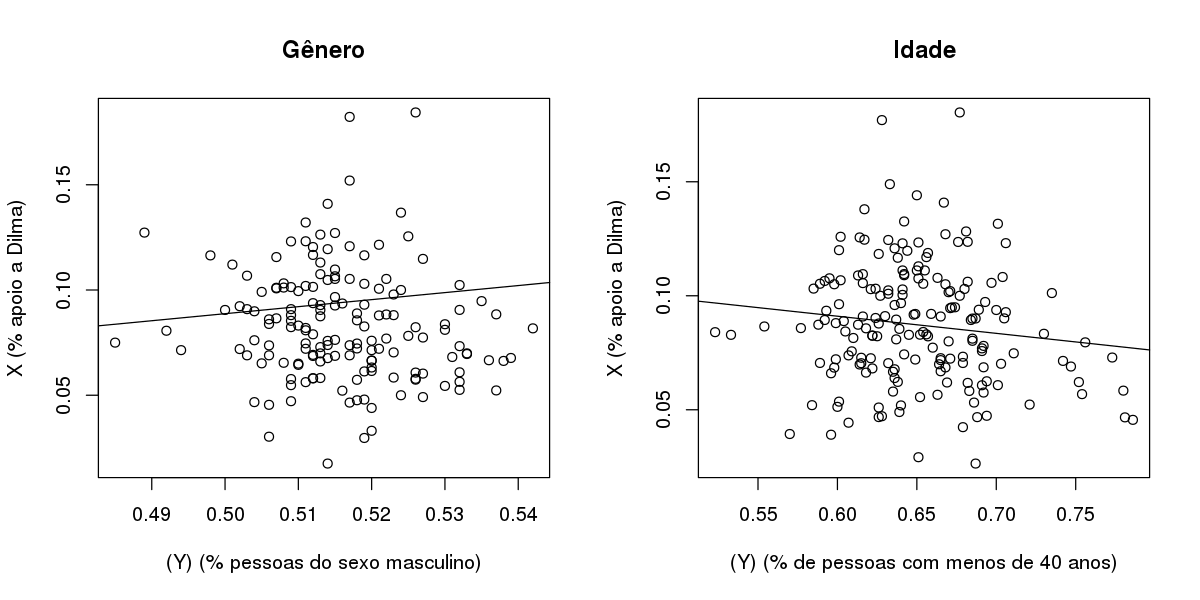

In [57]:
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
plot(1-gender_data$Y, (gender_data$X),xlab="(Y) (% pessoas do sexo masculino)", ylab="X (% apoio a Dilma)", main = "Gênero")
fit <- lm(gender_data$X ~ (gender_data$Y) )
abline(fit)
plot(age_data$Y, (age_data$X),xlab="(Y) (% de pessoas com menos de 40 anos)", ylab="X (% apoio a Dilma)", main = "Idade")
fit <- lm( age_data$X ~ (age_data$Y) )
abline(fit)

# Using ground-truth of inner cells, we can see correlation between IBGE census versus observed gender and age support to Dilma  (W1 and W2 vs Y and 1-Y)

### Line in plots are Lowess curves

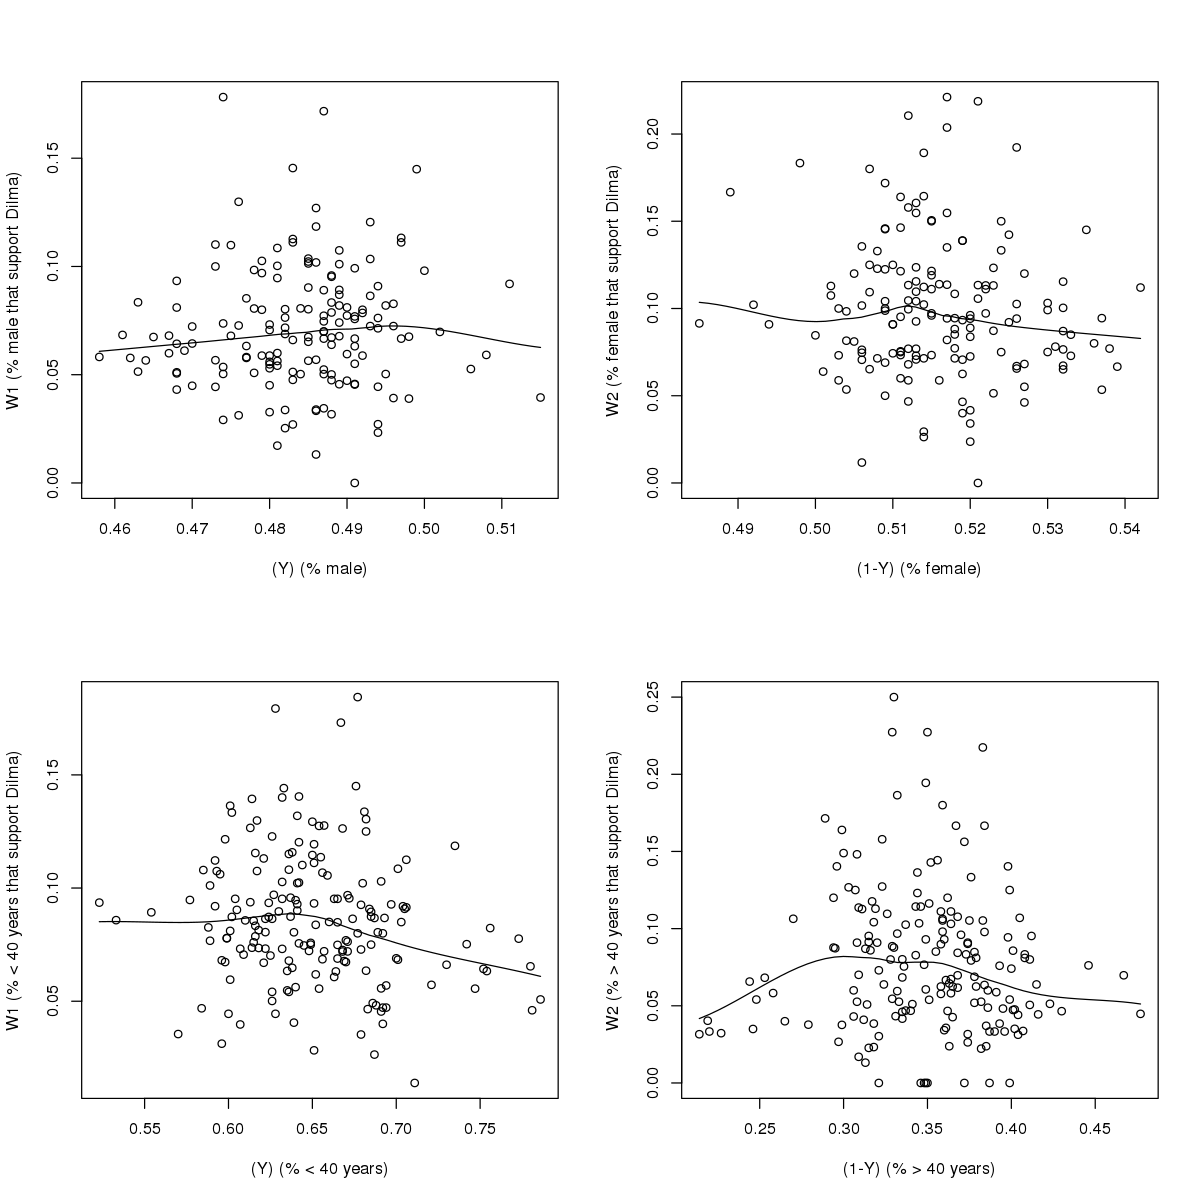

In [12]:
require(graphics)
par(mfrow=c(2,2))
options(repr.plot.width=10, repr.plot.height=10)
scatter.smooth(gender_data$Y, gender_data$W1 ,xlab="(Y) (% male)", ylab="W1 (% male that support Dilma)")
scatter.smooth(1-gender_data$Y, gender_data$W2,xlab="(1-Y) (% female)", ylab="W2 (% female that support Dilma)")
scatter.smooth(age_data$Y, age_data$W1 ,xlab="(Y) (% < 40 years)", ylab="W1 (% < 40 years that support Dilma)")
scatter.smooth(1-age_data$Y, age_data$W2,xlab="(1-Y) (% > 40 years)", ylab="W2 (% > 40 years that support Dilma)")

# Tomography plots (Possible values of W1 and W2 are in projections of lines respectively in x and y)


Tomography lines are the visualization of possible values of W1 and W2. They follow the equation :

* W1 = (T/1-X) - (X/1-X)W2

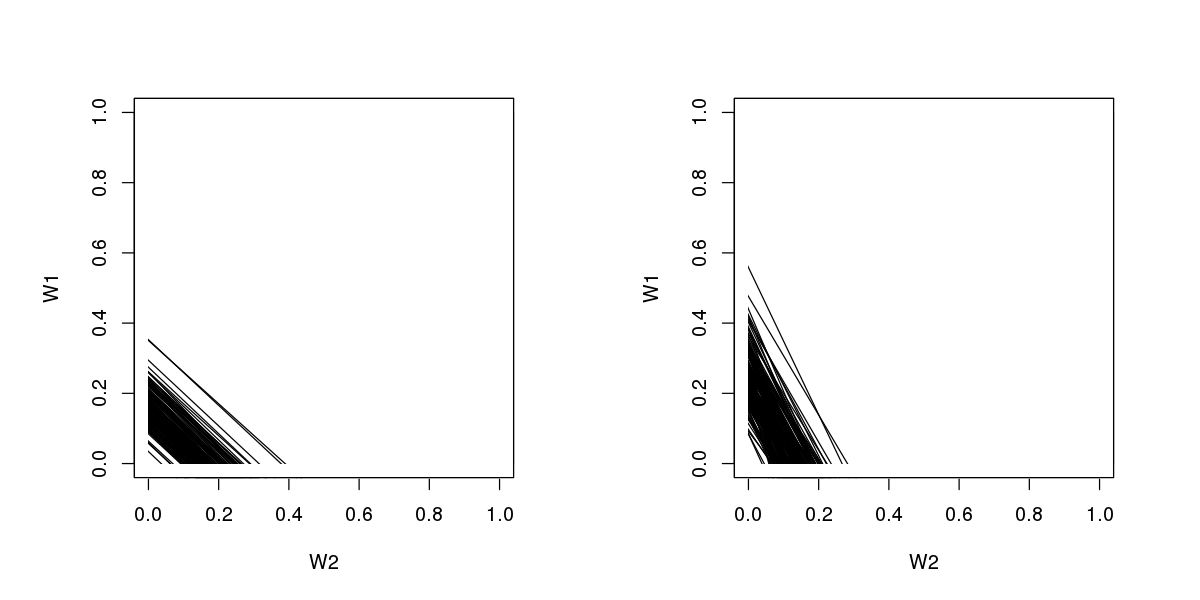

In [135]:
library(MCMCpack)
library(ei)
par(mfrow=c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
a <-tomogplot( gender_data$Y , (1- gender_data$Y), (gender_data$X), (1-gender_data$X),xlab="W2",ylab="W1")
a <-tomogplot( age_data$Y ,(1-age_data$Y) , (age_data$X), (1-age_data$X),xlab="W2",ylab="W1")

# If we divide the dataset in two partititions, with =~ 3 months each, do we observe similar trends?

In [141]:
gender_data_range_1 = read.csv("../data/range1_gt_age.csv")
age_data_range_1 = read.csv("../data/range1_gt_genero.csv")
gender_data_range_1 = gender_data_range_1[gender_data_range_1$N>100,]
age_data_range_1 = age_data_range_1[age_data_range_1$N>100,]

gender_data_range_2 = read.csv("../data/range2_gt_age.csv")
age_data_range_2 = read.csv("../data/range2_gt_genero.csv")
gender_data_range_2 = gender_data_range_2[gender_data_range_2$N>100,]
age_data_range_2 = age_data_range_2[age_data_range_2$N>100,]

sprintf("Mean of support to Dilma over cities: %f%%", mean(gender_data_range_1$X)) 
sprintf("Mean of male support to Dilma over cities: %f%%", mean(gender_data_range_1$W1)) 
sprintf("Mean of female support to Dilma over cities: %f%%", mean(gender_data_range_1$W2)) 
sprintf("Mean of people with less than 40 years support to Dilma over cities: %f%%", mean(age_data_range_1$W1)) 
sprintf("Mean of people with more than 40 years support to Dilma over cities: %f%%", mean(age_data_range_1$W2)) 

sprintf("Mean of support to Dilma over cities: %f%%", mean(gender_data_range_2$X)) 
sprintf("Mean of male support to Dilma over cities: %f%%", mean(gender_data_range_2$W1)) 
sprintf("Mean of female support to Dilma over cities: %f%%", mean(gender_data_range_2$W2)) 
sprintf("Mean of people with less than 40 years support to Dilma over cities: %f%%", mean(age_data_range_2$W1)) 
sprintf("Mean of people with more than 40 years support to Dilma over cities: %f%%", mean(age_data_range_2$W2)) 

[1] "Mean of support to Dilma over cities: 0.089459%"

[1] "Mean of male support to Dilma over cities: 0.090842%"

[1] "Mean of female support to Dilma over cities: 0.075155%"

[1] "Mean of people with less than 40 years support to Dilma over cities: 0.068327%"

[1] "Mean of people with more than 40 years support to Dilma over cities: 0.103499%"

[1] "Mean of support to Dilma over cities: 0.074322%"

[1] "Mean of male support to Dilma over cities: 0.074417%"

[1] "Mean of female support to Dilma over cities: 0.058578%"

[1] "Mean of people with less than 40 years support to Dilma over cities: 0.061241%"

[1] "Mean of people with more than 40 years support to Dilma over cities: 0.082543%"